# Import

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import statistics
from scipy import signal, stats
from scipy.optimize import curve_fit
from cycler import cycler
from scipy.special import gamma

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%matplotlib inline

In [3]:
def get_plot_data(ax, filename) :
    header = ax.get_xlabel()
    data = ax.lines[0].get_xdata()
    for line in ax.lines :
        header = header + ' ' + line.get_label() 
        data = np.vstack((data,line.get_ydata()))
    data = np.transpose(data)
    np.savetxt(filename+'.dat', data, fmt='%.18e', delimiter=' ', newline='\n', header=header, footer='', comments='# ', encoding=None)
    return ('saved to ' + filename) 

In [4]:
def get_plot_data_blocks(ax, filename) :
    for line in ax.lines :
        header = ax.get_xlabel() + ' ' + line.get_label() 
        data = np.vstack((line.get_xdata(),line.get_ydata()))
        data = np.transpose(data)
        np.savetxt(filename+'_'+line.get_label()+'.dat', data, fmt='%.18e', delimiter=' ', newline='\n', header=header, footer='', comments='# ', encoding=None)
    return ('saved to ' + filename) 

# Data structure

In [5]:
# set1 = [{'Sc': 100.0, 'nb_sca' : 1, 'N': 192, 'eps': 0.1, 'folder' : 'Sc100/D0prime_const/e01/', 'D0': 8.36E-4, 'field_ite' : 55000, 'h5_ite' : 55000},
#         {'Sc': 100.0, 'nb_sca' : 1, 'N': 192, 'eps': 0.5, 'folder' : 'Sc100/D0prime_const/e05/', 'D0': 4.18E-3, 'field_ite' : 55000, 'h5_ite' : 55000},
#         {'Sc': 100.0, 'nb_sca' : 1, 'N': 192, 'eps': 1.0, 'folder' : 'Sc100/D0prime_const/e10/', 'D0': 8.36E-3, 'field_ite' : 55000, 'h5_ite' : 55000},
#         {'Sc': 100.0, 'nb_sca' : 1, 'N': 192, 'eps': 1.5, 'folder' : 'Sc100/D0prime_const/e15/', 'D0': 12.54E-3, 'field_ite' : 55000, 'h5_ite' : 55000},
#         {'Sc': 100.0, 'nb_sca' : 1, 'N': 192, 'eps': 2.0, 'folder' : 'Sc100/D0prime_const/e20/', 'D0': 16.73E-3, 'field_ite' : 55000, 'h5_ite' : 55000}]

In [6]:
# set2 = [{'Sc': 200.0, 'nb_sca' : 1, 'N': 192, 'eps': 0.1, 'folder' : 'Sc200/D0prime_const/e01/', 'D0': 8.36E-4, 'field_ite' : 54000, 'h5_ite' : 50000},
#         {'Sc': 200.0, 'nb_sca' : 1, 'N': 192, 'eps': 0.5, 'folder' : 'Sc200/D0prime_const/e05/', 'D0': 4.18E-3, 'field_ite' : 55000, 'h5_ite' : 55000},
#         {'Sc': 200.0, 'nb_sca' : 1, 'N': 192, 'eps': 1.0, 'folder' : 'Sc200/D0prime_const/e10/', 'D0': 8.36E-3, 'field_ite' : 56000, 'h5_ite' : 55000},
#         {'Sc': 200.0, 'nb_sca' : 1, 'N': 192, 'eps': 1.5, 'folder' : 'Sc200/D0prime_const/e15/', 'D0': 12.54E-3, 'field_ite' : 24000, 'h5_ite' : 20000},
#         {'Sc': 200.0, 'nb_sca' : 1, 'N': 192, 'eps': 2.0, 'folder' : 'Sc200/D0prime_const/e20/', 'D0': 16.73E-3, 'field_ite' : 24000, 'h5_ite' : 20000}]

In [7]:
set_dissip = [{'Sc': 10.0, 'nb_sca' : 1, 'N': 192, 'eps': 0.1, 'folder' : 'Sc10/e01/', 'D0': 8.36E-4, 'field_ite' : 79000, 'h5_ite' : 75000, 'runs' : [26], 'A' : 13.8137, 'u' : 2.42},
        {'Sc': 10.0, 'nb_sca' : 1, 'N': 192, 'eps': 0.5, 'folder' : 'Sc10/e05/', 'D0': 4.18E-3, 'field_ite' : 31000, 'h5_ite' : 30000, 'runs' : [5], 'A' : 6.1680, 'u' : 3.62},
        {'Sc': 10.0, 'nb_sca' : 1, 'N': 192, 'eps': 1.0, 'folder' : 'Sc10/e10/', 'D0': 8.36E-3, 'field_ite' : 30000, 'h5_ite' : 30000, 'runs' : [5], 'A' : 2.9558, 'u' : 3.55},
        {'Sc': 10.0, 'nb_sca' : 1, 'N': 192, 'eps': 1.5, 'folder' : 'Sc10/e15/', 'D0': 12.54E-3, 'field_ite' : 30000, 'h5_ite' : 30000, 'runs' : [5], 'A' : 1.7235, 'u' : 3.32},
        {'Sc': 10.0, 'nb_sca' : 1, 'N': 192, 'eps': 2.0, 'folder' : 'Sc10/e20/', 'D0': 16.73E-3, 'field_ite' : 30000, 'h5_ite' : 30000, 'runs' : [5], 'A' : 1.1249, 'u' : 3.09}]

In [8]:
# set_inertial = [{'Sc': 164.0, 'nb_sca' : 1, 'N': 384, 'eps': 0.1, 'folder' : 'Sc_var/e01/N384/', 'D0': 8.36E-4, 'field_ite' : 62000, 'h5_ite' : 60000, 'runs' : [4]},
#         {'Sc': 584.0, 'nb_sca' : 1, 'N': 384, 'eps': 0.5, 'folder' : 'Sc_var/e05/N384/', 'D0': 4.18E-3, 'field_ite' : 100000, 'h5_ite' : 60000, 'runs' : [8]},
#         {'Sc': 5711.0, 'nb_sca' : 1, 'N': 384, 'eps': 1.0, 'folder' : 'Sc_var/e10/N384/', 'D0': 8.36E-3, 'field_ite' : 53000, 'h5_ite' : 70000, 'runs' : [4]},
#         {'Sc': 49730.0, 'nb_sca' : 1, 'N': 384, 'eps': 1.5, 'folder' : 'Sc_var/e15/N384/', 'D0': 12.54E-3, 'field_ite' : 49000, 'h5_ite' : 70000, 'runs' : [3]}]
#         #{'Sc': 68132.0, 'nb_sca' : 1, 'N': 256, 'eps': 2.0, 'folder' : 'Sc_var/e20/N256/', 'D0': 16.73E-3, 'field_ite' : 62000, 'h5_ite' : 60000}]

In [9]:
set_inertial = [{'Sc': 164.0, 'nb_sca' : 1, 'N': 256, 'eps': 0.1, 'folder' : 'Sc_var/e01/N256/', 'D0': 8.36E-4, 'field_ite' : 62000, 'h5_ite' : 60000, 'runs' : [8], 'A' : 14.56, 'u' : 2.87},
        {'Sc': 584.0, 'nb_sca' : 1, 'N': 256, 'eps': 0.5, 'folder' : 'Sc_var/e05/N256/', 'D0': 4.18E-3, 'field_ite' : 62000, 'h5_ite' : 60000, 'runs' : [10], 'A' : 6.28, 'u' : 4.22},
        #{'Sc': 5711.0, 'nb_sca' : 1, 'N': 256, 'eps': 1.0, 'folder' : 'Sc_var/e10/N256/kd300/', 'D0': 8.36E-3, 'field_ite' : 72000, 'h5_ite' : 70000, 'runs' : [9], 'A' : 2.9558},
        {'Sc': 5711.0, 'nb_sca' : 1, 'N': 384, 'eps': 1.0, 'folder' : 'Sc_var/e10/N384/', 'D0': 8.3650976202353233E-003, 'field_ite' : 10000, 'h5_ite' : 10000, 'runs' : [17], 'A' : 2.9776848909102855, 'u' : 3.54},
        #{'Sc': 39464.0, 'nb_sca' : 1, 'N': 256, 'eps': 1.5, 'folder' : 'Sc_var/e15/N256/kd300/', 'D0': 12.54E-3, 'field_ite' : 72000, 'h5_ite' : 70000, 'runs' : [9], 'A' : 1.7235},
        {'Sc': 39464.0, 'nb_sca' : 1, 'N': 384, 'eps': 1.5, 'folder' : 'Sc_var/e15/N384/', 'D0': 12.54E-3, 'field_ite' : 10000, 'h5_ite' : 10000, 'runs' : [17], 'A' : 1.7254, 'u' : 3.32},
        {'Sc': 68132.0, 'nb_sca' : 1, 'N': 256, 'eps': 2.0, 'folder' : 'Sc_var/e20/N256/', 'D0': 16.73E-3, 'field_ite' : 62000, 'h5_ite' : 60000, 'runs' : [9], 'A' : 1.1249, 'u' : 3.09}]

## Parameters

In [10]:
viscosity = 1.0

Calculate diffusivity $\kappa = \cfrac{\nu}{Sc}$

In [11]:
for index, simu in enumerate(np.concatenate((set_dissip,set_inertial))) :
    simu.update({'diffusivity': viscosity/simu["Sc"]})

Calculate Péclet number : $Pe = \cfrac{D_0^\prime l^\epsilon}{\kappa} = \cfrac{D_0 l^\epsilon}{\epsilon \kappa}$

In [12]:
def peclet(D0, l, kappa, epsilon) :
    return D0/epsilon*(l**epsilon)/kappa

Calculate the characteristic diffusion length scale : $r_d = \left( \cfrac{\kappa}{D_0^\prime}\right)^{1/\epsilon}  = \left( \cfrac{\kappa \epsilon}{D_0}\right)^{1/\epsilon} $

In [13]:
def diffusion_length_scale(D0, kappa, epsilon) :
    return (kappa*epsilon/D0)**(1.0/epsilon)

Scalar forcing length scale $l = \cfrac{2\pi}{k_f}$ :

In [14]:
scalar_L = 2.0*np.pi/3.5

In [15]:
def kappa_ren(kappa,D0,A, d) :
    return (kappa + 1.0/(2.0*d)*D0*A*3.0)

In [16]:
for index, simu in enumerate(np.concatenate((set_dissip,set_inertial))) :
    print(simu['diffusivity'], kappa_ren(simu['diffusivity'], simu['D0'], simu['A'], 3.0))

0.1 0.1057741266
0.1 0.11289112000000001
0.1 0.112355244
0.1 0.110806345
0.1 0.10940978850000001
0.006097560975609756 0.012183640975609757
0.0017123287671232876 0.014837528767123288
0.0001751006828926633 0.012629413080274817
2.533954996959254e-05 0.010843597549969592
1.4677390946985263e-05 0.009424465890946985


In [17]:
for index, simu in enumerate(np.concatenate((set_dissip,set_inertial))) :
    simu['Pe'] = peclet(simu['D0'], scalar_L, simu['diffusivity'], simu['eps'])
    print(simu['Pe'])
    simu['rd'] = diffusion_length_scale(simu['D0'], simu['diffusivity'], simu['eps'])
#    print(simu['rd'])

0.08863749213359405
0.11201139072748148
0.15007836905148952
0.20108237841590385
0.2695811944983264
1.4536548709909425
6.541465218484919
85.76201921954394
793.5514981805229
1836.7105943559977


In [18]:
for index, simu in enumerate(np.concatenate((set_dissip,set_inertial))) :
    print(peclet(simu['D0'], simu['rd'], simu['diffusivity'], simu['eps']))

1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0000000000000004
1.0000000000000002


# Reading data

In [19]:
# read correlation files
def read_data_file(common_folder, scalar, file_type, spec_type, spec_component, run_files) :
    nb_of_runs = len(run_files)
    for run_index in list(range(nb_of_runs)) :
        folder = common_folder + "run" + "%01d" % (run_index+1) + "/"
        if (run_files[run_index] < 1000) :
            file = folder + "scalar%01d" %scalar + "_" + file_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%03d" % run_files[run_index] + ".table"
        else : 
            file = folder + file_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%06d" % run_files[run_index] + ".table"
        file_data = []
        print('reading file: ' + file)
        averaging_weight = (run_files[run_index]+1)/(sum(run_files)+nb_of_runs)
        for line in open(file) :
            temp_array_line = []
            if line[0] == '#' :          #skip commented lines
                continue
            else :
                temp_array_line=list(map(float, line.split( )))
                temp_array_line = [t * averaging_weight for t in temp_array_line]
                file_data.append(temp_array_line)  
        if (run_index == 0) : 
            accumulated_data = file_data.copy()
        else : 
            accumulated_data = list(map(lambda l1, l2: [sum(x) for x in zip(l1, l2)], accumulated_data, file_data))
    k = np.array(accumulated_data[0])
    nb_of_modes = np.array(accumulated_data[1])
    average_data = np.ndarray(shape=(len(accumulated_data)-2, k.shape[0]+1), dtype=float)
    for i in list(range(average_data.shape[0])) : 
        average_data[i, :] = np.array(accumulated_data[i+2])
    t = average_data[:,0]
    numpy_file_table = np.array(average_data[:,1:])
    return [k, nb_of_modes, t, numpy_file_table]

In [20]:
# read velocity spectrum file
def read_spec_file(common_folder, forlder_in, quantity, spec_type, ite) :
    file = common_folder + forlder_in + quantity + "_" + spec_type + "_ite=%06d" % ite + ".table"
    print('reading file: ' + file)
    file_data = []
    for line in open(file) :
        temp_array_line = []
        if line[0] == '#' :          #skip commented lines
            continue
        else :
            temp_array_line=list(map(float, line.split( )))
            file_data.append(temp_array_line)  
    spec_table = np.array(file_data)
    k = spec_table[:,0]
    nb_of_modes = spec_table[:,1]
    Ek = spec_table[:,2]
#     Exx = spec_table[:,3]
#     Eyy = spec_table[:,4]
#     Ezz = spec_table[:,5]
    #return [k, nb_of_modes, Ek, Exx, Eyy, Ezz, spec_table[:,6], spec_table[:,7], spec_table[:,8], spec_table[:,9]]
    return [k, nb_of_modes, Ek]

In [21]:
common_folder = "/home/gorbunov8a/data/random_advection/eps_dep/"

In [22]:
for simu in np.concatenate((set_dissip,set_inertial)) :
    [k, nb_of_modes, Es] = read_spec_file(common_folder + simu['folder'], "", "spectrum_scalar1", "lin", simu['field_ite'])
    simu.update({'Es': Es*4.0*np.pi*(k**2)/nb_of_modes, 'k' : k})
    [k, nb_of_modes, Ek] = read_spec_file(common_folder + simu['folder'], "", "vel_spec", "lin", simu['field_ite'])
    simu.update({'Ek': Ek*4.0*np.pi*(k**2)/nb_of_modes})

reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e01/spectrum_scalar1_lin_ite=079000.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e01/vel_spec_lin_ite=079000.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e05/spectrum_scalar1_lin_ite=031000.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e05/vel_spec_lin_ite=031000.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e10/spectrum_scalar1_lin_ite=030000.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e10/vel_spec_lin_ite=030000.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e15/spectrum_scalar1_lin_ite=030000.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e15/vel_spec_lin_ite=030000.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e20/spectrum_scalar1_lin_ite=030000.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep

# Time non-dimensional params

In [23]:
scalar_L = 2.0*np.pi/3.5

In [25]:
# for simu in np.concatenate((set_inertial,set_dissip)) :
#     tau0 = scalar_L/simu['u']
#     print('%2.2e' % ((simu['t'][1] - simu['t'][0])/tau0))

# Plotting params

In [26]:
# Plotting options
plt.rc('axes', labelsize=12)  
plt.rc('axes', titlesize=12)  
plt.rc('legend', fontsize=12)  

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
default_cycler = cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors))
plt.rc('axes', prop_cycle=default_cycler)

In [27]:
kmin = 10
kmax = np.max(k)-20
nb_of_curves = 4
step = round((kmax - kmin)/nb_of_curves)
indices_of_k_to_plot = np.arange(kmin,kmax,step, dtype=np.int16)
print(indices_of_k_to_plot)

[ 10  34  58  82 106]


In [28]:
for index, simu in enumerate(set_dissip) :
    simu.update({'marker': ".", "color" : colors[index], "linestyle" : '--'})

for index, simu in enumerate(set_inertial) :
    simu.update({'marker': "s", "color" : colors[index], "linestyle" : '-'})

# Scalar spectra

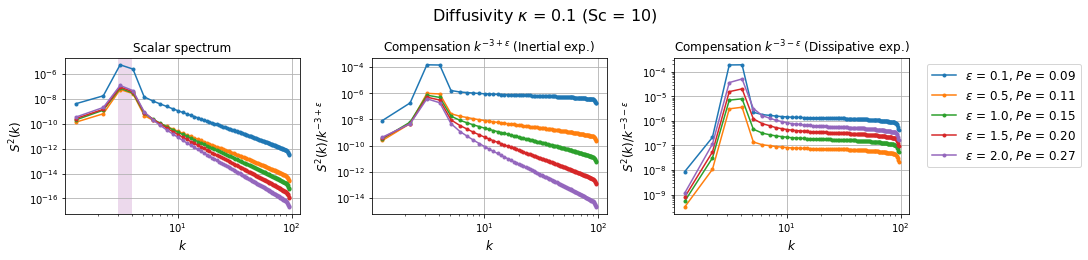

In [29]:
fig, ax = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(15,3.5))
tit = fig.suptitle(r'Diffusivity $\kappa$ = 0.1 (Sc = 10)', fontsize=16)
for index, simu in enumerate(set_dissip) :
    ax[0].plot(simu['k'], simu['Es'], '.-', color=simu['color'])
    ax[1].plot(simu['k'], simu['Es']/(simu['k']**(-3+simu['eps'])), '.-', color=simu['color'])
    ax[2].plot(simu['k'], simu['Es']/(simu['k']**(-3-simu['eps'])), '.-', color=simu['color'], \
              label=r'$\epsilon$ = %2.1f, $Pe$ = %2.2f' % (simu['eps'], simu['Pe']))

#ax[0].plot(k,10e-3*k**(-3), 'k--'); ax[0].annotate(r'$k^{-3}$', xy=(30, 0.5e-4), xycoords='data', size='16', color='k')

ax[0].axvspan(3.0, 4.0, facecolor='purple', alpha=0.15)
#ax[0].text(3.5, 10e-8, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
ax[0].set(xscale='log', yscale='log', xlabel=r'$k$', ylabel=r'$S^2(k)$', title=r'Scalar spectrum'); ax[0].grid()
ax[1].set(xscale='log', yscale='log', xlabel=r'$k$', ylabel=r'$S^2(k)/k^{-3+\epsilon}$', title=r'Compensation $k^{-3+\epsilon}$ (Inertial exp.)'); ax[1].grid()
ax[2].set(xscale='log', yscale='log', xlabel=r'$k$', ylabel=r'$S^2(k)/k^{-3-\epsilon}$', title=r'Compensation $k^{-3-\epsilon}$ (Dissipative exp.)'); ax[2].grid()
#ax[1].set(ylim=[10e-7,5e-3])
lgd = ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#pp = PdfPages('../Images/Scalar/var_eps_Sc10_spec_scalar.pdf')
#pp.savefig(bbox_extra_artists=(tit, lgd,), bbox_inches='tight')
#pp.close()

plt.show()

In [30]:
set_inertial[0]['coef'] = 17e-5
set_inertial[1]['coef'] = 30e-5
set_inertial[2]['coef'] = 45e-5
set_inertial[3]['coef'] = 45e-5
set_inertial[4]['coef'] = 35e-5

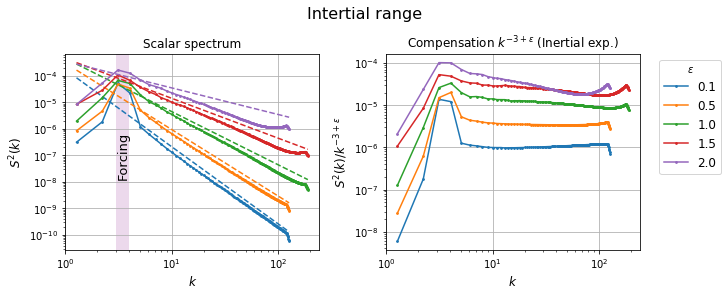

In [31]:
fig, ax = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(10,4))
tit = fig.suptitle(r'Intertial range', fontsize=16)
for index, simu in enumerate(set_inertial[:]) :
    ax[0].plot(simu['k'], simu['Es'], '.-', color=simu['color'], ms=3.5)
    ax[1].plot(simu['k'], simu['Es']/((0.2*simu['k'])**(-3+simu['eps'])), '.-', color=simu['color'], ms=3.5, label=r'%2.1f' % (simu['eps']))
    ax[0].plot(simu['k'], simu['coef']*simu['k']**(-3.0+simu['eps']), '--', color=simu['color'])

ax[0].axvspan(3.0, 4.0, facecolor='purple', alpha=0.15)
ax[0].text(3.5, 10e-8, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
ax[0].set(xscale='log', yscale='log', xlabel=r'$k$', ylabel=r'$S^2(k)$', title=r'Scalar spectrum'); ax[0].grid()
ax[1].set(xscale='log', yscale='log', xlabel=r'$k$', ylabel=r'$S^2(k)/k^{-3+\epsilon}$', title=r'Compensation $k^{-3+\epsilon}$ (Inertial exp.)'); ax[1].grid()
#ax[1].set(ylim=[10e-7,5e-3])
lgd = ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r'$\epsilon$')

#pp = PdfPages('../Images/Scalar/var_eps_intertial_range_spec_scalar.pdf')
#pp.savefig(bbox_extra_artists=(tit, lgd,), bbox_inches='tight')
#pp.close()

plt.show()

## Local exponent

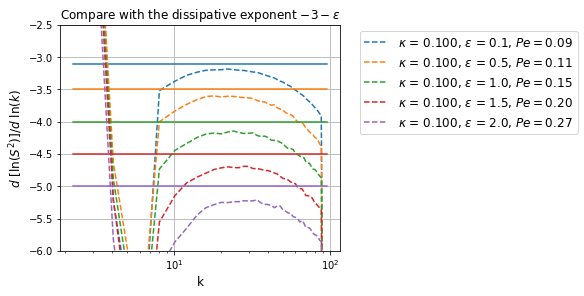

In [32]:
# check the log-log slope of the mean energy
resampling = 2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4),  constrained_layout=True)
for index, simu in enumerate(set_dissip) :
    x = simu['k'][1::resampling]
    slope = np.gradient(np.log(simu['Es'][1::resampling]), np.log(x))
    ax.plot(x, slope, color=simu['color'], ls=simu['linestyle'], \
            label=r'$\kappa$ = %2.3f, $\epsilon$ = %2.1f, $Pe = %2.2f$' % (simu['diffusivity'], simu['eps'], simu['Pe']))
    ax.plot(x, np.full_like(x, (-3.0-simu['eps']), dtype=float), '-', color=simu['color'])
#ax.plot(x, np.full_like(x, (-1.0+eps), dtype=float), '--', label=r'$-1+\epsilon$', color='gray')

ax.set(xscale='log', yscale='linear', title=r'Compare with the dissipative exponent $-3-\epsilon$', xlabel='k', ylabel=r'$d\ [\ln(S^2)]/d\ \ln (k)$'); ax.grid()
ax.set(ylim=[-6,-2.5])
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

#pp = PdfPages('../Images/Scalar/var_eps_spec_exponent.pdf')
#pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
#pp.close()

plt.show()

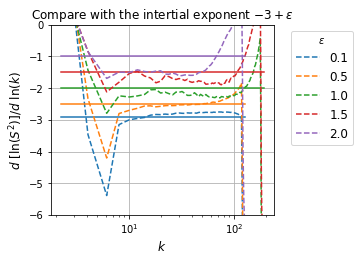

In [33]:
# check the log-log slope of the mean energy
resampling = 2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3.5))
for index, simu in enumerate(set_inertial) :
#for index, simu in enumerate(set3) :
    x = simu['k'][1::resampling]
    slope = np.gradient(np.log(simu['Es'][1::resampling]), np.log(x))
    ax.plot(x, slope, color=simu['color'], ls='--', label=r'%2.1f' % (simu['eps']))
    ax.plot(x, np.full_like(x, (-3.0+simu['eps']), dtype=float), '-', color=simu['color'])
#ax.plot(x, np.full_like(x, (-1.0+eps), dtype=float), '--', label=r'$-1+\epsilon$', color='gray')

ax.set(xscale='log', yscale='linear', title=r'Compare with the intertial exponent $-3+\epsilon$', xlabel=r'$k$', ylabel=r'$d\ [\ln(S^2)]/d\ \ln (k)$'); ax.grid()
ax.set(ylim=[-6,0.0])
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r'$\epsilon$', fontsize=12)

#pp = PdfPages('../Images/Scalar/var_eps_spec_exponent_inertial.pdf')
#pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
#pp.close()

plt.show()

# Compare h5 fields

In [34]:
import h5py

In [35]:
# Read scalar fields
for simu in np.concatenate((set_dissip,set_inertial)) :
    try :
        file = h5py.File(common_folder + simu['folder'] + 'ScalarS1_' + "%06d" % simu['h5_ite'] + '.h5', 'r')
        simu['scal_field'] = file['ScalarS1'][:,:] # copy the file data into a numpy array
        file.close()
    except : 
        simu['scal_field'] = np.zeros((simu['N'],simu['N'],simu['N']))

In [36]:
# Read velocity fields
for simu in set_inertial :
    try :
        file = h5py.File(common_folder + simu['folder'] + 'U.h5', 'r')
        simu['U'] = file['U'][:,:] # copy the file data into a numpy array
        file.close()
    except : 
        simu['U'] = np.zeros((simu['N'],simu['N'],simu['N']))

In [37]:
x_cut = 30

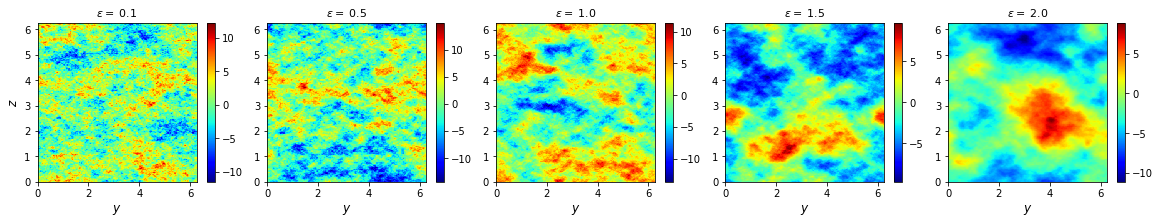

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16,3), constrained_layout=True)
plt.rc('axes', titlesize=11)  
plt.rc('axes', labelsize=11)
for index, simu in enumerate(set_inertial) :
        x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
        im = ax[index].pcolormesh(x_scal, x_scal, simu['U'][x_cut, :,:], cmap='jet')
        ax[index].set(xscale='linear', yscale='linear',xlabel=r'$y$', title=r'$\epsilon = $ %2.1f' % (simu['eps']))
        fig.colorbar(im, ax=ax[index], aspect=100)
ax[0].set(ylabel=r'$z$')
#plt.savefig("../Images/Scalar/var_eps_Sc10_scalar_fields.png", dpi=150, format="png")
plt.show()

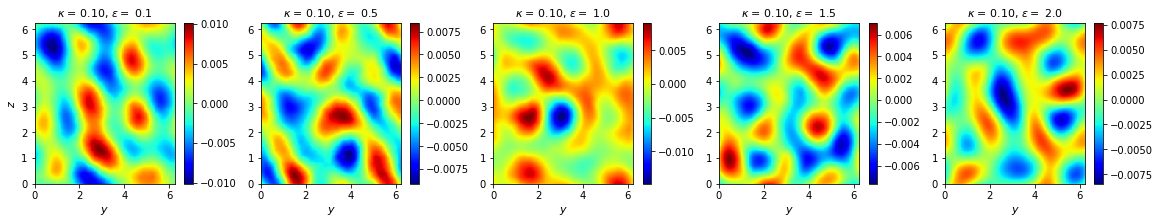

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16,3), constrained_layout=True)
plt.rc('axes', titlesize=11)  
plt.rc('axes', labelsize=11)
for index, simu in enumerate(set_dissip) :
        x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
        im = ax[index].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:], cmap='jet')
        ax[index].set(xscale='linear', yscale='linear',xlabel=r'$y$', title=r'$\kappa$ = %2.2f, $\epsilon = $ %2.1f' % (simu['diffusivity'], simu['eps']))
        fig.colorbar(im, ax=ax[index], aspect=100)
ax[0].set(ylabel=r'$z$')
#plt.savefig("../Images/Scalar/var_eps_Sc10_scalar_fields.png", dpi=150, format="png")
plt.show()

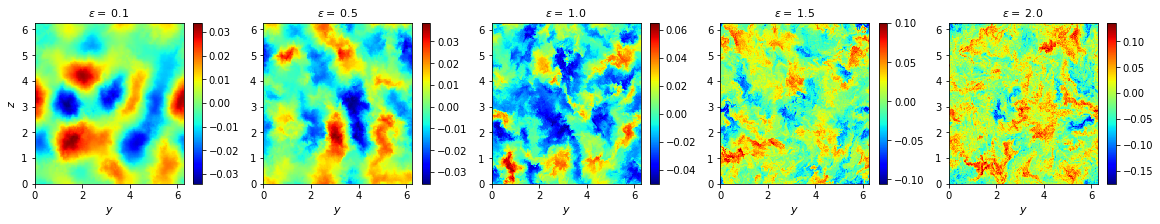

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16,3), constrained_layout=True)
plt.rc('axes', titlesize=11)  
plt.rc('axes', labelsize=11)
for index, simu in enumerate(set_inertial) :
        x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
        im = ax[index].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:], cmap='jet')
        ax[index].set(xscale='linear', yscale='linear',xlabel=r'$y$', title=r'$\epsilon = $ %2.1f' % (simu['eps']))
        fig.colorbar(im, ax=ax[index], aspect=100)
ax[0].set(ylabel=r'$z$')
#plt.savefig("../Images/Scalar/var_eps_inertial_scalar_fields.png", dpi=150, format="png")
plt.show()

# Time correlations

## Read data

In [41]:
#read correlation files
def read_data_file(common_folder, scalar, file_type, spec_type, spec_component, run_files) :
    nb_of_runs = len(run_files)
    for run_index in list(range(nb_of_runs)) :
        folder = common_folder + "run" + "%01d" % (run_index+1) + "/"
        if (run_files[run_index] < 1000) :
            file = folder + "scalar%01d" %scalar + "_" + file_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%03d" % run_files[run_index] + ".table"
        else : 
            file = folder + file_type + "_" + spec_type + "_C" + spec_component + "_wi=" + "%06d" % run_files[run_index] + ".table"
        file_data = []
        print('reading file: ' + file)
        averaging_weight = (run_files[run_index]+1)/(sum(run_files)+nb_of_runs)
        for line in open(file) :
            temp_array_line = []
            if line[0] == '#' :          #skip commented lines
                continue
            else :
                temp_array_line=list(map(float, line.split( )))
                temp_array_line = [t * averaging_weight for t in temp_array_line]
                file_data.append(temp_array_line)  
        if (run_index == 0) : 
            accumulated_data = file_data.copy()
        else : 
            accumulated_data = list(map(lambda l1, l2: [sum(x) for x in zip(l1, l2)], accumulated_data, file_data))
    k = np.array(accumulated_data[0])
    nb_of_modes = np.array(accumulated_data[1])
    average_data = np.ndarray(shape=(len(accumulated_data)-2, k.shape[0]+1), dtype=float)
    for i in list(range(average_data.shape[0])) : 
        average_data[i, :] = np.array(accumulated_data[i+2])
    t = average_data[:,0]
    numpy_file_table = np.array(average_data[:,1:])
    return [k, nb_of_modes, t, numpy_file_table]

In [42]:
# read correlation data files
for simu in np.concatenate((set_dissip,set_inertial)) :
    [k, nb_of_modes, time, two_point_corr] = read_data_file(common_folder + simu['folder'], 1, "two_point_corr_complex", "lin", "avg", simu['runs'])
    simu.update({'corr': two_point_corr, 't': time, 'k' : k, 'nb_of_modes' : nb_of_modes})

reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e01/run1/scalar1_two_point_corr_complex_lin_Cavg_wi=026.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e05/run1/scalar1_two_point_corr_complex_lin_Cavg_wi=005.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e10/run1/scalar1_two_point_corr_complex_lin_Cavg_wi=005.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e15/run1/scalar1_two_point_corr_complex_lin_Cavg_wi=005.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc10/e20/run1/scalar1_two_point_corr_complex_lin_Cavg_wi=005.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc_var/e01/N256/run1/scalar1_two_point_corr_complex_lin_Cavg_wi=008.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc_var/e05/N256/run1/scalar1_two_point_corr_complex_lin_Cavg_wi=010.table
reading file: /home/gorbunov8a/data/random_advection/eps_dep/Sc_var/e10/N384/run1/scalar1_

## Plot time correlations

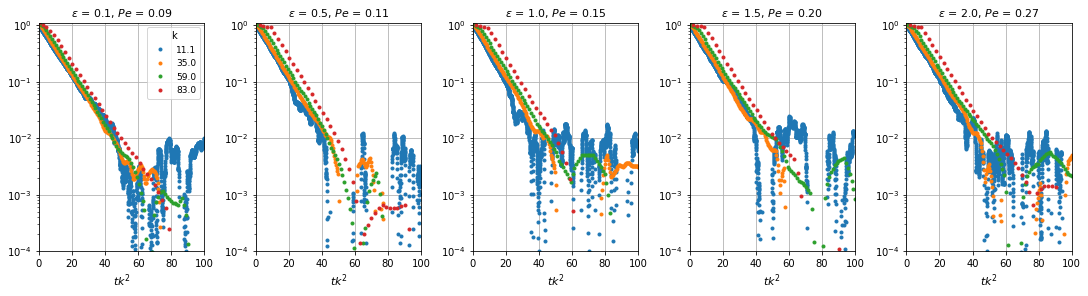

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=5, constrained_layout=True,figsize=(15,4))
for i, simu in enumerate(set_dissip):
    for ik in indices_of_k_to_plot[:-1] :
        xscaling = simu['k'][ik]**2
        #xscaling = 1.0
        ax[i].plot(simu['t']*xscaling, simu['corr'][:,ik]/simu['corr'][1,ik], '.', label=r'%2.1f' % (simu['k'][ik]))
    ax[i].set(xscale='linear',yscale='log', xlabel=r'$t k^2$', title=r'$\epsilon$ = %2.1f, $Pe$ = %2.2f' % (simu['eps'],simu['Pe'])); ax[i].grid()
    ax[i].set(xlim=[0,100.0], ylim=[10e-5,1.1])
ax[0].legend(loc='best', title='k', fontsize=9)
#pp = PdfPages('../Images/Scalar/var_eps_Sc10_time_corr.pdf')
#pp.savefig(bbox_inches='tight')
#pp.close()

plt.show()

## Fit correlations

In [44]:
def simple_exp(x, a, c):   
    return np.exp(-a * x + c) 
def simple_exp_jacobian(x, a, c):   
    return np.transpose([-x*np.exp(-a * x + c), np.exp(-a * x + c)])

In [45]:
for simu in set_dissip :
    simu['tk2_end_fit'] = 20.0
for simu in set_inertial :
    simu['tk2_end_fit'] = 180.0

In [46]:
min_coef = 5
for simu in np.concatenate((set_dissip,set_inertial)) :
    N = len(simu['t']); Nmin = N//min_coef; Nmax = N-5
    simu['a'] = np.zeros_like(simu['k'], dtype=float); simu['c'] = np.zeros_like(simu['k'], dtype=float)
    simu['a_std_error'] = np.zeros_like(simu['k'], dtype=float); simu['c_std_error'] = np.zeros_like(simu['k'], dtype=float)
    a = 10
    for ik in list(range(len(simu['k']))) : 
        b = np.searchsorted(simu['t']*(simu['k'][ik]**2), simu['tk2_end_fit'])
        if (b == 0) : b = Nmax
        if ((b-a) > 5) :
            coef, covar = curve_fit(simple_exp, simu['t'][a:b], simu['corr'][a:b,ik]/simu['corr'][1,ik], jac=simple_exp_jacobian, absolute_sigma=False)
            [simu['a'][ik], simu['c'][ik]] = coef
            [simu['a_std_error'][ik], simu['c_std_error'][ik]] = np.sqrt(np.diag(covar))
        else : 
            simu['a'][ik] = np.nan; simu['c'][ik] = np.nan; simu['a_std_error'][ik] = np.nan; simu['c_std_error'][ik] = np.nan
            #print("got nan for ik=%2.1f" % ik)

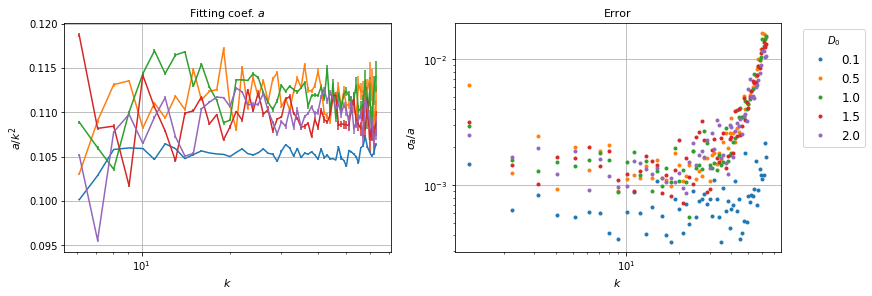

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), constrained_layout=True)
for simu in set_dissip :
    ax[0].errorbar(simu['k'][5::], (simu['a']/simu['k']**2)[5::], yerr=(simu['a_std_error']/simu['k']**2)[5::])
    ax[1].plot(simu['k'], simu['a_std_error']/simu['a'], '.', label=r'%2.1f' % simu['eps'])
ax[0].set(xlabel=r'$k$', ylabel=r'$a/k^2$', xscale='log', yscale='linear', title=r'Fitting coef. $a$'); ax[0].grid()
ax[1].set(xlabel=r'$k$', ylabel=r'$\sigma_a/a$', xscale='log', yscale='log', title=r'Error'); ax[1].grid()
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r'$D_0$')
plt.show()

In [48]:
def find_plateau(data) :
    N = len(data)
    Nmin = N//2
    a = 0; b = N-1
    minAlign = np.max(data-np.mean(data))/np.float(b-a+1)
    for i in list(range(0, N-Nmin-1)) :
        for j in list(range(i+Nmin, N-1)) :
            newAlign = np.max(data[i:j]-np.mean(data[i:j]))/np.float(j-i+1)
            if (newAlign < minAlign) :
                minAlign = newAlign
                a = i; b = j
    return np.mean(data[a:b]), np.std(data[a:b]), (b-a+1), a, b

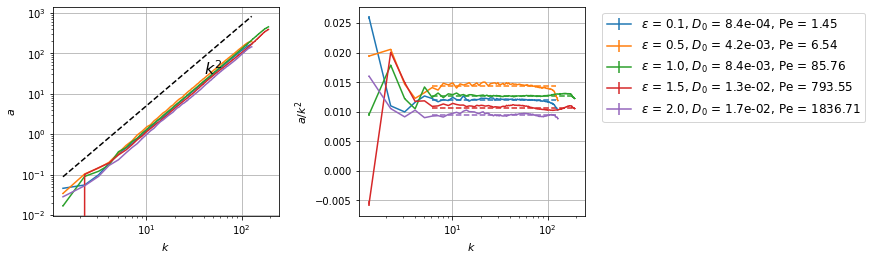

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,3.5), constrained_layout=True)
for i,simu in enumerate(set_inertial) :
    if (len(np.argwhere(np.isnan(simu['a']))) > 0) :
        sl = np.s_[5:np.argwhere(np.isnan(simu['a']))[0,0]-1]
    else:
        sl = np.s_[5:-5]
    ax[0].errorbar(simu['k'], simu['a'], yerr=simu['a_std_error'], label=r'%2.2e' % simu['D0'])
    simu['plateau_a'] = find_plateau(simu['a'][sl]/(simu['k'][sl]**2))[0]
    simu['std_err_plateau_a'] = np.sqrt(np.sum((simu['a'][sl]/(simu['k'][sl]**2)-simu['plateau_a'])**2)/len(simu['k'][sl]-1))
    ax[1].errorbar(simu['k'], simu['a']/(simu['k']**2), yerr=simu['a_std_error']/(simu['k']**2), \
                   label=r'$\epsilon$ = %2.1f, $D_0$ = %2.1e, Pe = %2.2f' % (simu['eps'], simu['D0'], simu['Pe']), color=colors[i])
    ax[1].plot(simu['k'][sl], np.full_like(simu['k'][sl], simu['plateau_a']), '--', color=colors[i])

ax[0].plot(simu['k'], 5e-2*simu['k']**2, 'k--')
ax[0].annotate(r'$k^2$', xy=(40, 30), xycoords='data', size='16')
ax[0].set(xscale='log', yscale='log', xlabel=r'$k$', ylabel=r'$a$'); ax[0].grid()
#ax.set(ylim=[5e2,10e6])
ax[1].set(xscale='log', yscale='linear', xlabel=r'$k$', ylabel=r'$a/k^2$'); ax[1].grid()
lgd = ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#pp = PdfPages('../Images/Scalar/var_eps_Sc10_corr_fit_vs_k_.pdf')
#pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
#pp.close()

plt.show()

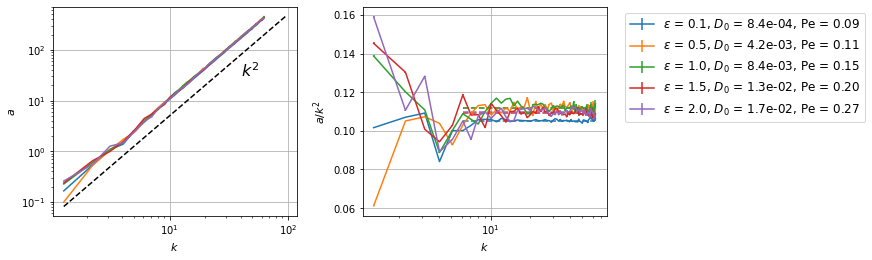

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,3.5), constrained_layout=True)
for i,simu in enumerate(set_dissip) :
    if (len(np.argwhere(np.isnan(simu['a']))) > 0) :
        sl = np.s_[5:np.argwhere(np.isnan(simu['a']))[0,0]-1]
    else:
        sl = np.s_[5:-5]
    ax[0].errorbar(simu['k'], simu['a'], yerr=simu['a_std_error'], label=r'%2.2e' % simu['D0'])
    simu['plateau_a'] = find_plateau(simu['a'][sl]/(simu['k'][sl]**2))[0]
    simu['std_err_plateau_a'] = np.sqrt(np.sum((simu['a'][sl]/(simu['k'][sl]**2)-simu['plateau_a'])**2)/len(simu['k'][sl]-1))
    ax[1].errorbar(simu['k'], simu['a']/(simu['k']**2), yerr=simu['a_std_error']/(simu['k']**2), \
                   label=r'$\epsilon$ = %2.1f, $D_0$ = %2.1e, Pe = %2.2f' % (simu['eps'], simu['D0'], simu['Pe']), color=colors[i])
    ax[1].plot(simu['k'][sl], np.full_like(simu['k'][sl], simu['plateau_a']), '--', color=colors[i])

ax[0].plot(simu['k'], 5e-2*simu['k']**2, 'k--')
ax[0].annotate(r'$k^2$', xy=(40, 30), xycoords='data', size='16')
ax[0].set(xscale='log', yscale='log', xlabel=r'$k$', ylabel=r'$a$'); ax[0].grid()
#ax.set(ylim=[5e2,10e6])
ax[1].set(xscale='log', yscale='linear', xlabel=r'$k$', ylabel=r'$a/k^2$'); ax[1].grid()
lgd = ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#pp = PdfPages('../Images/Scalar/var_eps_Sc10_corr_fit_vs_k_.pdf')
#pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
#pp.close()

plt.show()

## Parameters

In [51]:
def theory_prefactor(d, eps, m) :
    return (2.0*np.pi)**d/(2.0*d)*gamma(eps*0.5)*m**(-eps)/(4.0*np.pi)**(0.5*d)*gamma(0.5*d+0.5*eps)

In [52]:
def estimate_m(eps, A) :
    return (3.0*gamma(1.5+0.5*eps)*A/((np.pi**1.5)*gamma(eps*0.5)))**(-1.0/eps)

In [53]:
for simu in set_inertial :
    simu['estimate_m'] = estimate_m(simu['eps'], simu['A'])
    print(simu['estimate_m'])

28822.12009975038
1.359439402451727
1.1048409264993557
1.1062271325550779
1.1141065278931965


In [54]:
for simu in set_inertial :
    print(theory_prefactor(3.0, simu['eps'], simu['estimate_m']))

5.751832921211567
2.6522824147296604
1.4888424454551425
1.107444553235461
0.9939311932565132


In [55]:
# Plotting options
plt.rc('axes', labelsize=16)  
plt.rc('axes', titlesize=14)  
plt.rc('legend', fontsize=12)  

## Correlation param vs. Eps

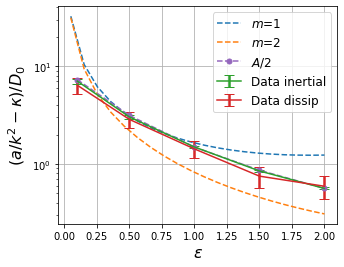

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
x = np.linspace(0.05,2.0,20)
ax.plot(x, theory_prefactor(3,x,1.0), '--', label='$m$=1')
ax.plot(x, theory_prefactor(3,x,2.0), '--', label='$m$=2')

x = np.array([simu['eps'] for simu in set_inertial])
y = [(simu['plateau_a']-simu['diffusivity'])/simu['D0'] for simu in set_inertial]
yerr = [(simu['std_err_plateau_a']/simu['D0']) for simu in set_inertial]
ax.errorbar(x,y, yerr=yerr, ms=5, elinewidth=2.5, capsize=5, label=r'Data inertial')

x = np.array([simu['eps'] for simu in set_dissip])
y = [(simu['plateau_a']-simu['diffusivity'])/simu['D0'] for simu in set_dissip]
yerr = [(simu['std_err_plateau_a']/simu['D0']) for simu in set_dissip]
ax.errorbar(x,y, yerr=yerr, ms=5, elinewidth=2.5, capsize=5, label=r'Data dissip')

ax.plot(x, [0.5*simu['A'] for simu in set_inertial], '.--', label=r'$A$/2', ms=10.0)

ax.set(xlabel=r'$\epsilon$', ylabel=r'$(a/k^2 - \kappa)/D_0$', xscale='linear', yscale='log'); ax.grid()
leg = ax.legend()

pp = PdfPages('../Images/Scalar/var_eps_intertial_corr_fit_vs_eps.pdf')
pp.savefig(bbox_inches='tight')
pp.close()
plt.show()

# Choice of parameters

Values of $D_0^\prime$ :

In [57]:
for simu in set_inertial :
    print(simu['D0']/simu['eps'])

0.00836
0.00836
0.008365097620235323
0.008360000000000001
0.008365


In [58]:
def estimate_Sc(kd, eps, D0) :
    return (kd/(2.0*np.pi))**eps*(eps/D0)

In [59]:
kd = 350

In [60]:
for simu in set_dissip :
    print(estimate_Sc(kd, simu['eps'], simu['D0']))

178.80618622110484
892.766345909367
6663.18541652672
49730.861942147625
370945.756012743


In [61]:
for simu in set_inertial :
    print(2.0*np.pi/simu['rd'])

147.46234068574478
149.7676852162678
300.1670672684038
299.9978357393595
149.99901593297528


# Plots for the paper

In [62]:
# Plotting options
plt.rc('axes', labelsize=16)  
plt.rc('axes', titlesize=16)  
plt.rc('legend', fontsize=14, title_fontsize=14)  

In [63]:
# bw_cycler = cycler(marker=["o", "s", "^", "*", "D"])
# plt.rc('axes', prop_cycle=bw_cycler)

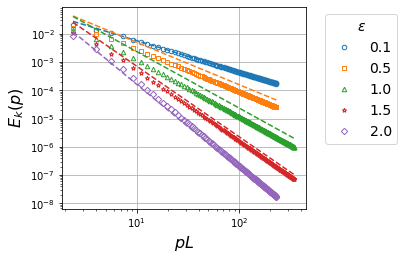

In [64]:
# velocity spectra
fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(5.5,3.5))
for index, simu in enumerate(set_inertial) :
    ax.plot(simu['k']*scalar_L, simu['Ek']/simu['eps'], fillstyle='none', ls="", label=r'%2.1f' % (simu['eps']), ms=4.5, color=colors[index])
    ax.plot(simu['k']*scalar_L, 25e3*simu['Ek'][1]*simu['k']**(-1.0-simu['eps'])*simu['coef']/(simu['eps']**0.8), '--', color=colors[index])
ax.set(xscale='log', yscale='log', xlabel=r'$pL$', ylabel=r'$E_k(p)$'); ax.grid()
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r'$\epsilon$', title_fontsize=14)

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/these/Figures/spectraScalarInertial.pdf')
# pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
# pp.close()

plt.show()

In [65]:
set_inertial[0]['coef'] = 20e-5
set_inertial[1]['coef'] = 45e-5
set_inertial[2]['coef'] = 55e-5
set_inertial[3]['coef'] = 65e-5
set_inertial[4]['coef'] = 40e-5

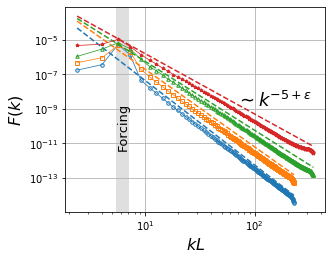

In [66]:
fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(4.5,3.5))
for index, simu in enumerate(set_inertial[:-1]) :
    ax.plot(simu['k']*scalar_L, simu['Es']/simu['k']**(2), ls="-", fillstyle='none', label=r'%2.1f' % (simu['eps']), ms=3.5, color=colors[index], lw=0.75)
    ax.plot(simu['k']*scalar_L, simu['coef']*simu['k']**(-5.0+simu['eps']), '--', color=colors[index])

ax.axvspan(3.0*scalar_L, 4.0*scalar_L, facecolor='gray', alpha=0.25)
ax.text(3.5*scalar_L, 10e-11, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
ax.set(xscale='log', yscale='log', xlabel=r'$kL$', ylabel=r'$F(k)$'); ax.grid()
ax.text(150, 3e-9, r"$\sim k^{-5+\epsilon}$", {'color': 'black', 'fontsize': 18},horizontalalignment='center',verticalalignment='center',clip_on=False)
#lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r'$\epsilon$', title_fontsize=14)

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/spectraScalarInertial.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()

plt.show()

In [67]:
# coef = 1.0
# fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(4.5,3.5))
# for index, simu in enumerate(set_dissip[:-1]) :
#     ax.plot(simu['k']*scalar_L, simu['Es']/simu['k']**(2), ls="-", fillstyle='none', label=r'%2.1f' % (simu['eps']), ms=3.5, color=colors[index], lw=0.75)
#     ax.plot(simu['k']*scalar_L, simu['coef']*simu['k']**(-5.0-simu['eps']), '--', color=colors[index])
# ax.set(xscale='log', yscale='log', xlabel=r'$kL$', ylabel=r'$F(k)$'); ax.grid()
# ax.axvspan(3.0*scalar_L, 4.0*scalar_L, facecolor='gray', alpha=0.25)
# ax.text(3.5*scalar_L, 15e-15, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
# ax.text(110, 3e-13, r"$\sim k^{-5-\epsilon}$", {'color': 'black', 'fontsize': 18},horizontalalignment='center',verticalalignment='center',clip_on=False)

# # pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/spectraScalarDissip.pdf')
# # pp.savefig(bbox_inches='tight')
# # pp.close()

# plt.show()

In [68]:
set_inertial[0]['coef_v'] = 60e-3
set_inertial[1]['coef_v'] = 65e-3
set_inertial[2]['coef_v'] = 60e-3
set_inertial[3]['coef_v'] = 60e-3
set_inertial[4]['coef_v'] = 40e-3

In [69]:
set_dissip[0]['coef'] = 50e-7
set_dissip[1]['coef'] = 30e-8
set_dissip[2]['coef'] = 30e-8
set_dissip[3]['coef'] = 65e-8
set_dissip[4]['coef'] = 40e-8

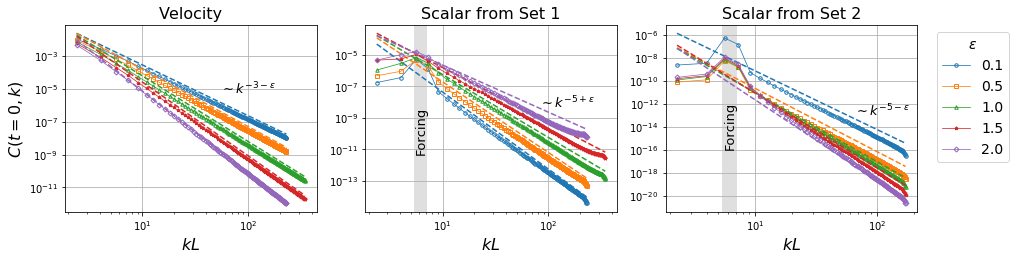

In [70]:
# both spectra
fig, ax = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(14,3.5))
for index, simu in enumerate(set_inertial) :
    ax[0].plot(simu['k']*scalar_L, simu['Ek']/simu['eps']/simu['k']**(2), fillstyle='none', ls="-", label=r'%2.1f' % (simu['eps']), ms=3.5, color=colors[index], lw=0.75)
    ax[0].plot(simu['k']*scalar_L, simu['coef_v']*simu['k']**(-3.0-simu['eps']), '--', color=colors[index])
    ax[1].plot(simu['k']*scalar_L, simu['Es']/simu['k']**(2), ls="-", fillstyle='none', label=r'%2.1f' % (simu['eps']), ms=3.5, color=colors[index], lw=0.75)
    ax[1].plot(simu['k']*scalar_L, simu['coef']*simu['k']**(-5.0+simu['eps']), '--', color=colors[index])
for index, simu in enumerate(set_dissip) :
    ax[2].plot(simu['k']*scalar_L, simu['Es']/simu['k']**(2), ls="-", fillstyle='none', label=r'%2.1f' % (simu['eps']), ms=3.5, color=colors[index], lw=0.75)
    ax[2].plot(simu['k']*scalar_L, simu['coef']*simu['k']**(-5.0-simu['eps']), '--', color=colors[index])
    
ax[0].set(title='Velocity', xscale='log', yscale='log', xlabel=r'$kL$', ylabel=r'$C(t=0, k)$'); ax[0].grid()
ax[0].text(100, 1e-5, r"$\sim k^{-3-\epsilon}$", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',clip_on=False)

ax[1].axvspan(3.0*scalar_L, 4.0*scalar_L, facecolor='gray', alpha=0.25)
ax[1].text(3.5*scalar_L, 15e-11, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
ax[1].text(150, 10e-9, r"$\sim k^{-5+\epsilon}$", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',clip_on=False)
ax[1].set(title='Scalar from Set 1', xscale='log', yscale='log', xlabel=r'$kL$'); ax[1].grid()

ax[2].set(title='Scalar from Set 2', xscale='log', yscale='log', xlabel=r'$kL$'); ax[2].grid()
ax[2].axvspan(3.0*scalar_L, 4.0*scalar_L, facecolor='gray', alpha=0.25)
ax[2].text(3.5*scalar_L, 15e-15, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
ax[2].text(110, 3e-13, r"$\sim k^{-5-\epsilon}$", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',clip_on=False)
lgd = ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r'$\epsilon$', title_fontsize=14)

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/these/Figures/spectraVelocityScalarInertial.pdf')
# pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
# pp.close()

plt.show()

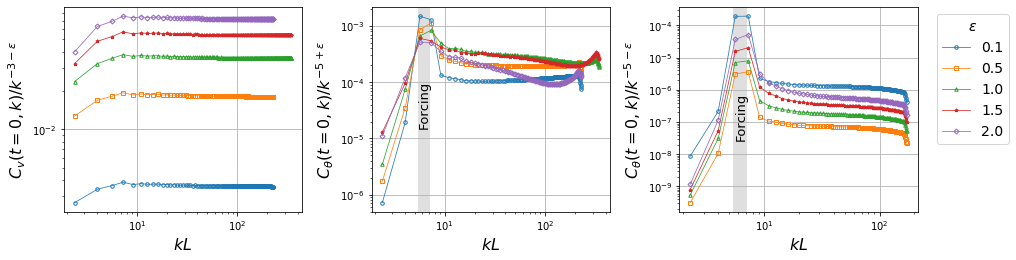

In [71]:
# both spectra
fig, ax = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(14,3.5))
for index, simu in enumerate(set_inertial) :
    ax[0].plot(simu['k']*scalar_L, simu['Ek']/simu['k']**(-1.0-simu['eps']), fillstyle='none', ls="-", label=r'%2.1f' % (simu['eps']), ms=3.5, color=colors[index], lw=0.75)
    ax[1].plot(simu['k']*scalar_L, simu['Es']/simu['k']**(2)/simu['k']**(-5.0+simu['eps']), ls="-", fillstyle='none', label=r'%2.1f' % (simu['eps']), ms=3.5, color=colors[index], lw=0.75)
for index, simu in enumerate(set_dissip) :
    ax[2].plot(simu['k']*scalar_L, simu['Es']/simu['k']**(2)/simu['k']**(-5.0-simu['eps']), ls="-", fillstyle='none', label=r'%2.1f' % (simu['eps']), ms=3.5, color=colors[index], lw=0.75)
    
ax[0].set(xscale='log', yscale='log', xlabel=r'$kL$', ylabel=r'$C_v(t=0, k)/k^{-3-\epsilon}$'); ax[0].grid()

ax[1].axvspan(3.0*scalar_L, 4.0*scalar_L, facecolor='gray', alpha=0.25)
ax[1].text(3.5*scalar_L, 40e-6, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
ax[1].set(xscale='log', yscale='log', xlabel=r'$kL$', ylabel=r'$C_\theta(t=0, k)/k^{-5+\epsilon}$'); ax[1].grid()

ax[2].set(xscale='log', yscale='log', xlabel=r'$kL$', ylabel=r'$C_\theta(t=0, k)/k^{-5-\epsilon}$'); ax[2].grid()
ax[2].axvspan(3.0*scalar_L, 4.0*scalar_L, facecolor='gray', alpha=0.25)
ax[2].text(3.5*scalar_L, 15e-8, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
lgd = ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r'$\epsilon$', title_fontsize=14)

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/these/Figures/spectraVelocityScalarCompensated.pdf')
# pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
# pp.close()

plt.show()

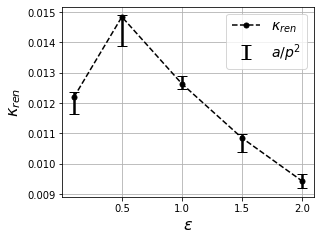

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,3.5))

current_set = set_inertial

x = np.array([simu['eps'] for simu in current_set])
y = [(simu['plateau_a']) for simu in current_set]
yerr = [(simu['std_err_plateau_a']) for simu in current_set]
ax.errorbar(x,y, yerr=yerr, elinewidth=2.5, capsize=5, label=r'$a/p^2$', ls="", ms=0)

ax.plot(x, [kappa_ren(simu['diffusivity'],simu['D0'],simu['A'],3) for simu in current_set], '.--', label=r'$\kappa_{ren}$', ms=10.0)

ax.set(xlabel=r'$\epsilon$', ylabel=r'$\kappa_{ren}$', xscale='linear', yscale='linear'); ax.grid()
leg = ax.legend()

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/scalarVSepsilon.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()

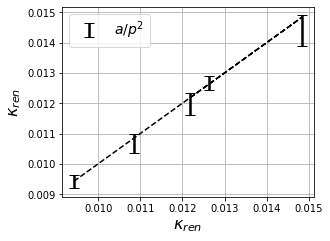

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5,3.5))

current_set = set_inertial

x = [kappa_ren(simu['diffusivity'],simu['D0'],simu['A'],3) for simu in current_set]
y = [(simu['plateau_a']) for simu in current_set]
yerr = [(simu['std_err_plateau_a']) for simu in current_set]
ax.errorbar(x,y, yerr=yerr, elinewidth=2.5, capsize=5, label=r'$a/p^2$', ls="", ms=0)
ax.plot(x,x,'k--')

ax.set(xlabel=r'$\kappa_{ren}$', ylabel=r'$\kappa_{ren}$', xscale='linear', yscale='linear'); ax.grid()
leg = ax.legend()

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/scalarVSepsilon.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()

In [74]:
print(yerr[:-1])

[0.00036405608852382783, 0.0005037815878949303, 0.00022425526682329764, 0.0003022158848625763]


In [75]:
bw_cycler2 = cycler(linestyle=['-', '--', ':', '-.'])

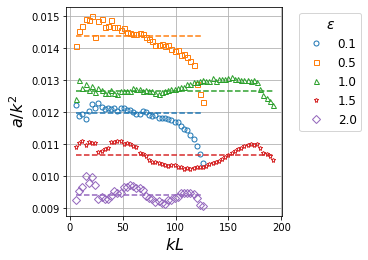

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(5,3.5))
for index, simu in enumerate(set_inertial) :
    sl = np.s_[5::3]
    ax.plot(simu['k'][sl], (simu['a']/simu['k']**2)[sl], ls="", fillstyle='none', ms=5.0, label=r'%2.1f' % (simu['eps']), color=colors[index])
    ax.plot(simu['k'][sl], np.full_like(simu['k'][sl], simu['plateau_a']), '--', color=colors[index])
ax.set(xscale='linear',yscale='linear', xlabel=r'$kL$', ylabel=r'$a/k^2$'); ax.grid()
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc='best', title=r'$\epsilon$', fontsize=12)

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/scalarTimeCorrKraichnanCoef.pdf')
# pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
# pp.close()

plt.show()

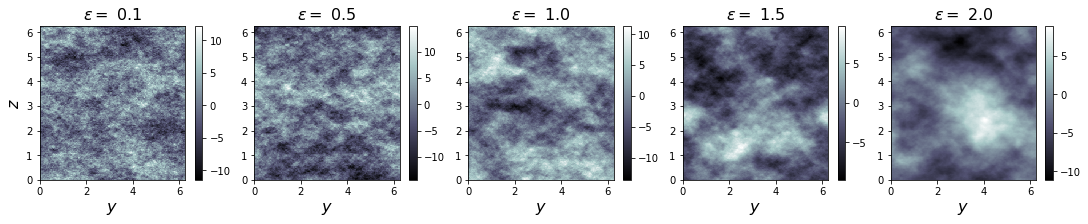

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,3), constrained_layout=True)
for index, simu in enumerate(set_inertial) :
        x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
        im = ax[index].pcolormesh(x_scal, x_scal, simu['U'][x_cut, :,:], cmap='bone')
        ax[index].set(xscale='linear', yscale='linear',xlabel=r'$y$', title=r'$\epsilon = $ %2.1f' % (simu['eps']))
        fig.colorbar(im, ax=ax[index], aspect=100)
ax[0].set(ylabel=r'$z$')
# plt.savefig("/home/gorbunov8a/Documents/Latex/these/Figures/velocityKraichnanFields.png", dpi=150, format="png")
plt.show()

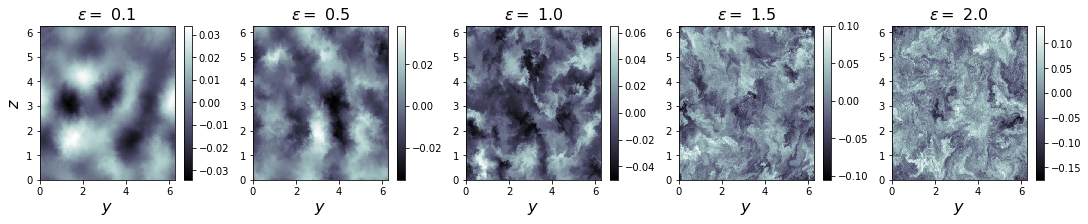

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,3), constrained_layout=True)
for index, simu in enumerate(set_inertial) :
        x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
        im = ax[index].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:], cmap='bone')
        ax[index].set(xscale='linear', yscale='linear',xlabel=r'$y$', title=r'$\epsilon = $ %2.1f' % (simu['eps']))
        fig.colorbar(im, ax=ax[index], aspect=100)
ax[0].set(ylabel=r'$z$')
# plt.savefig("/home/gorbunov8a/Documents/Latex/these/Figures/scalarKraichnanFields.png", dpi=150, format="png")
plt.show()

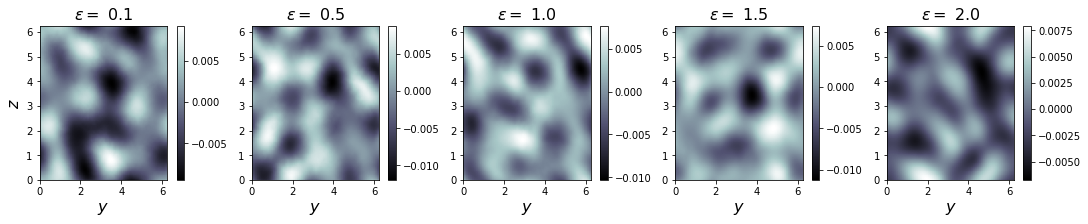

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,3), constrained_layout=True)
x_cut = 50
for index, simu in enumerate(set_dissip) :
        x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
        im = ax[index].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:], cmap='bone')
        ax[index].set(xscale='linear', yscale='linear',xlabel=r'$y$', title=r'$\epsilon = $ %2.1f' % (simu['eps']))
        fig.colorbar(im, ax=ax[index], aspect=100)
ax[0].set(ylabel=r'$z$')
# plt.savefig("/home/gorbunov8a/Documents/Latex/these/Figures/scalarKraichnanFieldsDissipative.png", dpi=150, format="png")
plt.show()

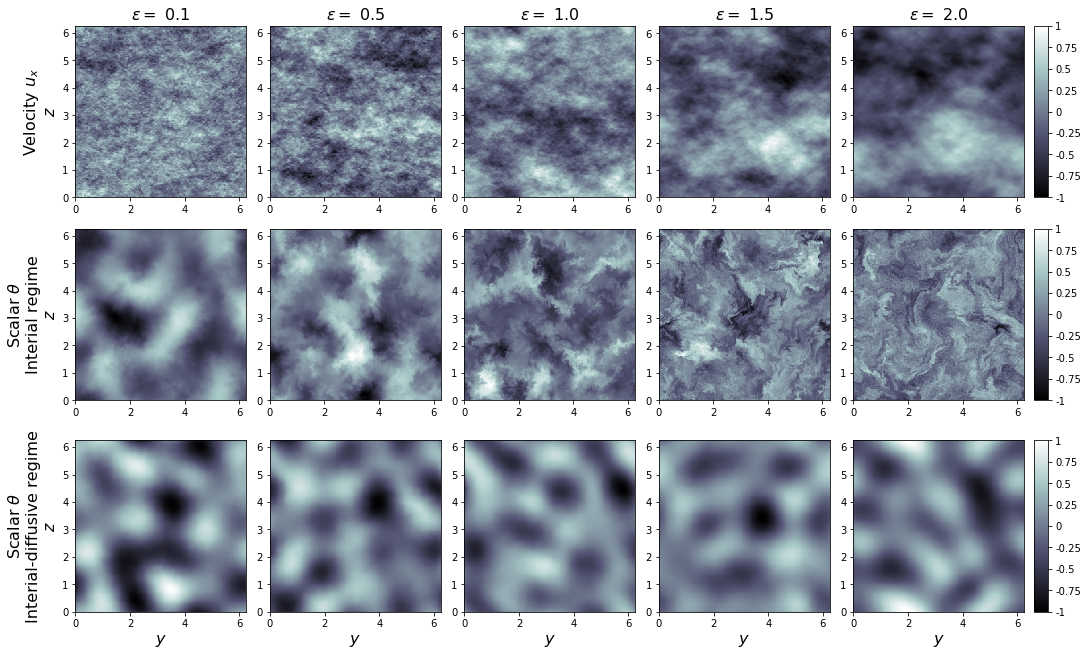

In [80]:
color_map='bone'

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15,9), constrained_layout=True)
for index, simu in enumerate(set_inertial) :
        x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
        im = ax[0,index].pcolormesh(x_scal, x_scal, simu['U'][x_cut, :,:]/np.max(np.abs(simu['U'][x_cut, :,:])), cmap=color_map, vmin=-1, vmax=1)
        ax[0,index].set(xscale='linear', yscale='linear',title=r'$\epsilon = $ %2.1f' % (simu['eps']))
        if index==4: fig.colorbar(im, ax=ax[0,4], format='%.2g')
        ax[0,0].set(ylabel=r'Velocity $u_x$' + '\n' + r'$z$')
for index, simu in enumerate(set_inertial) :
        x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
        im = ax[1,index].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:]/np.max(np.abs(simu['scal_field'][x_cut, :,:])), cmap=color_map, vmin=-1, vmax=1)
        ax[1,index].set(xscale='linear', yscale='linear')
        if index==4: fig.colorbar(im, ax=ax[1,4], format='%.2g')    
        ax[1,0].set(ylabel=r'Scalar $\theta$' + '\n' + 'Interial regime' + '\n' + r'$z$')
for index, simu in enumerate(set_dissip) :
        x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
        im = ax[2,index].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:]/np.max(np.abs(simu['scal_field'][x_cut, :,:])), cmap=color_map, vmin=-1, vmax=1)
        ax[2,index].set(xscale='linear', yscale='linear',xlabel=r'$y$')
        if index==4: fig.colorbar(im, ax=ax[2,4], format='%.2g')
        ax[2,0].set(ylabel=r'Scalar $\theta$' + '\n' + 'Interial-diffusive regime' + '\n' + r'$z$')

#plt.savefig("/home/gorbunov8a/Documents/Latex/these_overleaf/60ed6b1cd4de842e8afa5cb1/Figures/allKraichnanFields.png", dpi=150, format="png")
plt.show()

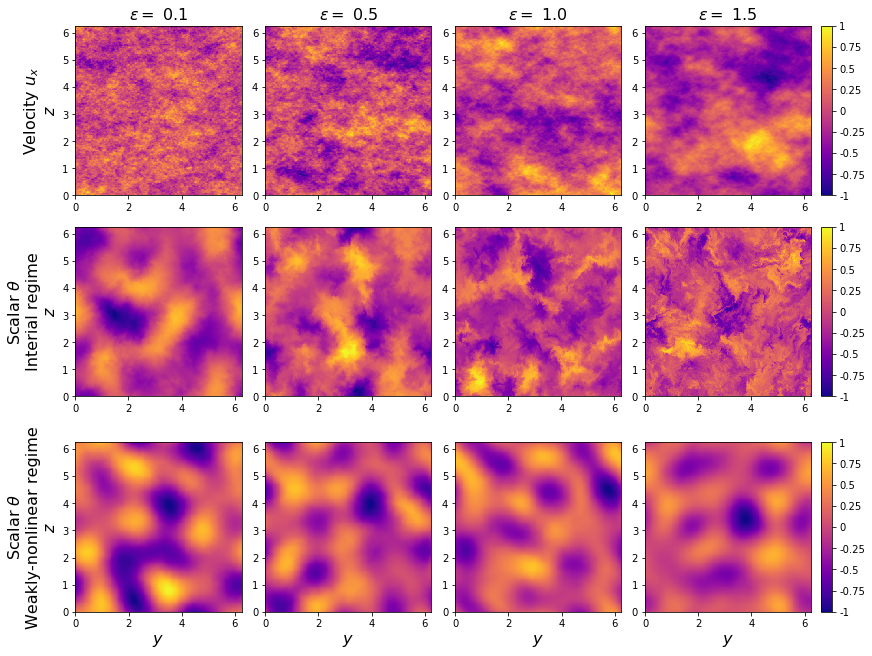

In [81]:
color_map='plasma'

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12,9), constrained_layout=True)
for index, simu in enumerate(set_inertial[:-1]) :
        x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
        im = ax[0,index].pcolormesh(x_scal, x_scal, simu['U'][x_cut, :,:]/np.max(np.abs(simu['U'][x_cut, :,:])), cmap=color_map, vmin=-1, vmax=1)
        ax[0,index].set(xscale='linear', yscale='linear',title=r'$\epsilon = $ %2.1f' % (simu['eps']))
        if index==3: fig.colorbar(im, ax=ax[0,3], format='%.2g')
        ax[0,0].set(ylabel=r'Velocity $u_x$' + '\n' + r'$z$')
for index, simu in enumerate(set_inertial[:-1]) :
        x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
        im = ax[1,index].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:]/np.max(np.abs(simu['scal_field'][x_cut, :,:])), cmap=color_map, vmin=-1, vmax=1)
        ax[1,index].set(xscale='linear', yscale='linear')
        if index==3: fig.colorbar(im, ax=ax[1,3], format='%.2g')    
        ax[1,0].set(ylabel=r'Scalar $\theta$' + '\n' + 'Interial regime' + '\n' + r'$z$')
for index, simu in enumerate(set_dissip[:-1]) :
        x_scal = 2.0*np.pi/simu['N']*np.arange(0,simu['N'])
        im = ax[2,index].pcolormesh(x_scal, x_scal, simu['scal_field'][x_cut, :,:]/np.max(np.abs(simu['scal_field'][x_cut, :,:])), cmap=color_map, vmin=-1, vmax=1)
        ax[2,index].set(xscale='linear', yscale='linear',xlabel=r'$y$')
        if index==3: fig.colorbar(im, ax=ax[2,3], format='%.2g')
        ax[2,0].set(ylabel=r'Scalar $\theta$' + '\n' + 'Weakly-nonlinear regime' + '\n' + r'$z$')

#plt.savefig("/home/gorbunov8a/Documents/Latex/Papers/PRL_advection_scalar/figures/allKraichnanFields.png", dpi=150, format="png")
plt.show()

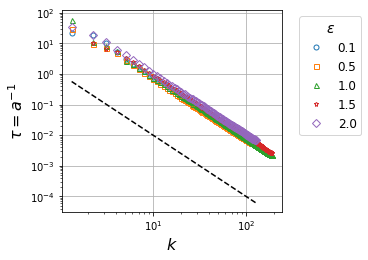

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(5,3.5))
for index, simu in enumerate(set_inertial) :
    sl = np.s_[1::]
    ax.plot(simu['k'], simu['a']**(-1), ls="", fillstyle='none', ms=5.0, label=r'%2.1f' % (simu['eps']), color=colors[index])
    #ax.plot(simu['k'], np.full_like(simu['k'], simu['plateau_a']), '--', color=colors[index])
ax.plot(simu['k'],simu['k']**(-2), 'k--')
ax.set(xscale='log',yscale='log', xlabel=r'$k$', ylabel=r'$\tau=a^{-1}$'); ax.grid()
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc='best', title=r'$\epsilon$', fontsize=12)

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/scalarTimeCorrKraichnan.pdf')
# pp.savefig(bbox_extra_artists=(lgd,), bbox_inches='tight')
# pp.close()
#get_plot_data_blocks(ax,'kraichnan_decorr_time_eps=')
plt.show()

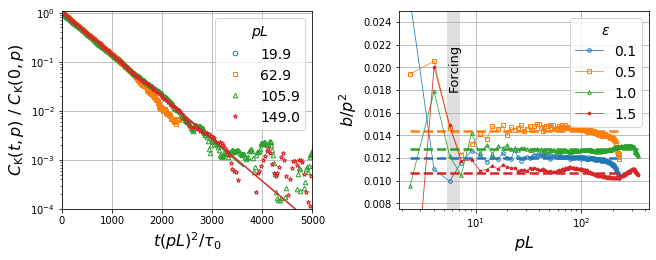

In [146]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,3.5), constrained_layout=True)
bw_cycler = cycler(marker=["o", "s", "^", "*", "D"])
plt.rc('axes', prop_cycle=bw_cycler)
simu = set_inertial[2]
for i,ik in enumerate(indices_of_k_to_plot[:-1]) :
    xscaling = (simu['k'][ik]*scalar_L)**2/(scalar_L/simu['u'])
    ax[0].plot(simu['t']*xscaling, simu['corr'][:,ik]/simu['corr'][1,ik], label=r'%2.1f' % (simu['k'][ik]*scalar_L), ls="", fillstyle='none', ms=4.5, color=colors[i], markevery=5)
    ax[0].plot(simu['t'][2:1000]*xscaling, simple_exp(simu['t'][2:1000], simu['a'][ik], simu['c'][ik]), '-', color=colors[i], lw = 1.5)
ax[0].set(xscale='linear',yscale='log', xlabel=r'$t (pL)^2/\tau_0$', ylabel=r'$C_{\rm{K}}(t,p) \ / \ C_{\rm{K}}(0,p)$'); ax[0].grid()
ax[0].set(xlim=[0,5000.0], ylim=[10e-5,1.1])
ax[0].legend(loc='best', title=r'$pL$')

for i,simu in enumerate(set_inertial[:-1]) :
    sl = np.s_[0::]
    simu['plateau_a'] = find_plateau(simu['a']/(simu['k']**2))[0]
    simu['std_err_plateau_a'] = np.sqrt(np.sum((simu['a']/(simu['k']**2)-simu['plateau_a'])**2)/len(simu['k']-1))
    ax[1].plot(simu['k'][sl]*scalar_L, simu['a'][sl]/(simu['k'][sl]**2), label=r'%2.1f' % simu['eps'], ls="-", fillstyle='none', ms=3.5, color=colors[i], lw=0.75)
    ax[1].plot(simu['k'][sl]*scalar_L, np.full_like(simu['k'][sl], simu['plateau_a']),  '--', color=colors[i], lw=2.5)
ax[1].set(xscale='log', yscale='linear', xlabel=r'$pL$', ylabel=r'$b/p^2$'); ax[1].grid()
ax[1].axvspan(3.0*scalar_L, 4.0*scalar_L, facecolor='grey', alpha=0.25)
ax[1].text(3.5*scalar_L, 0.020, "Forcing", {'color': 'black', 'fontsize': 13},horizontalalignment='center',verticalalignment='center',rotation=90,clip_on=False)
ax[1].set(ylim=[0.0075,0.025])
lgd = ax[1].legend(loc='upper right', title=r'$\epsilon$')

# pp = PdfPages('/home/gorbunov8a/Documents/Latex/Papers/paper-prl-scalar/figures/scalarTimeCorrKraichnanUPD.pdf')
# pp.savefig(bbox_inches='tight')
# pp.close()

plt.show()